# Линейные модели

## Обдасти применения линейных моделей

1. Регрессионные модели
2. Классификационные модели
3. Unsupervised модели (например PCA)
4. **Линейные модели - базовая ячейка для всех остальных моделей, включая нейросети  (пример ниже на скрине)**

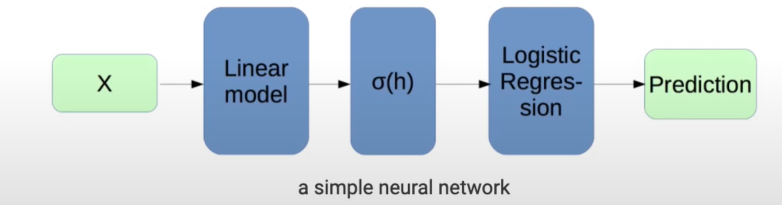

## Преимущества линейных моделей

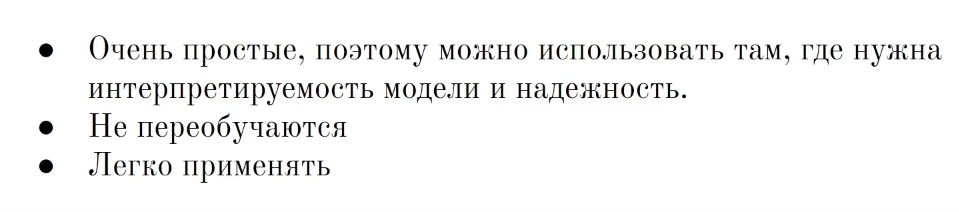

Пример применения линейной модели: определение вероятности того, что клиент вернет кредит

Ленейные модели хорошо работают на данных с **небольшим числом признаков**

## Линейная регрессия (регрессионная модель)

**Регрессия** - зависимость среднего значения какой-либо случайной величины от некоторой другой случайной величины или от нескольких (случайных) величин.
E(Y|X) - матожидание величины Y

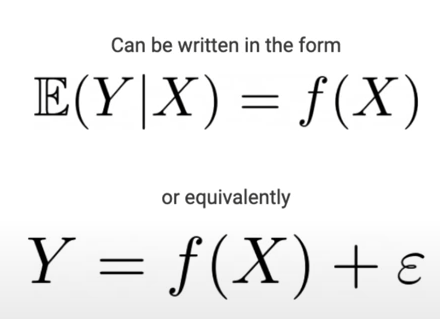

X - матрица признаков (каждый признак - случайная величина)

Y - метки классов

epsilon - случайный шум (ошибка). Обычно E(epsilon) = 0


**Линейная регрессия** - это регрессия, в которой f(X) - линейная функция.

## Постановка задачи

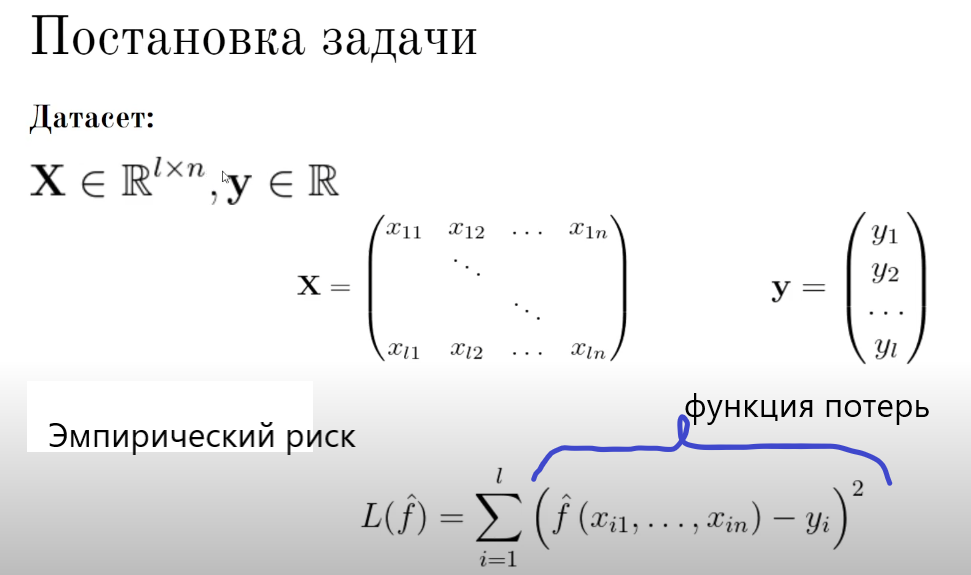

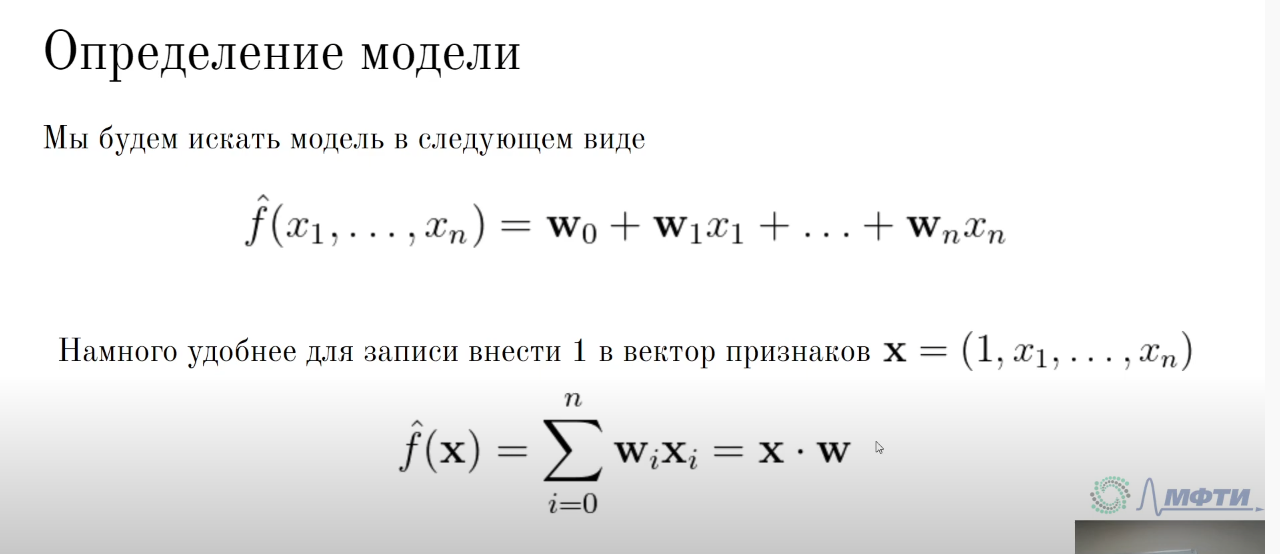

Где w - вектор-столбец весов
x - вектор признаков
x * w - скалярное произведение 
1 - свободный член (чтобы можно было двигать в пространстве гиперплоскость)
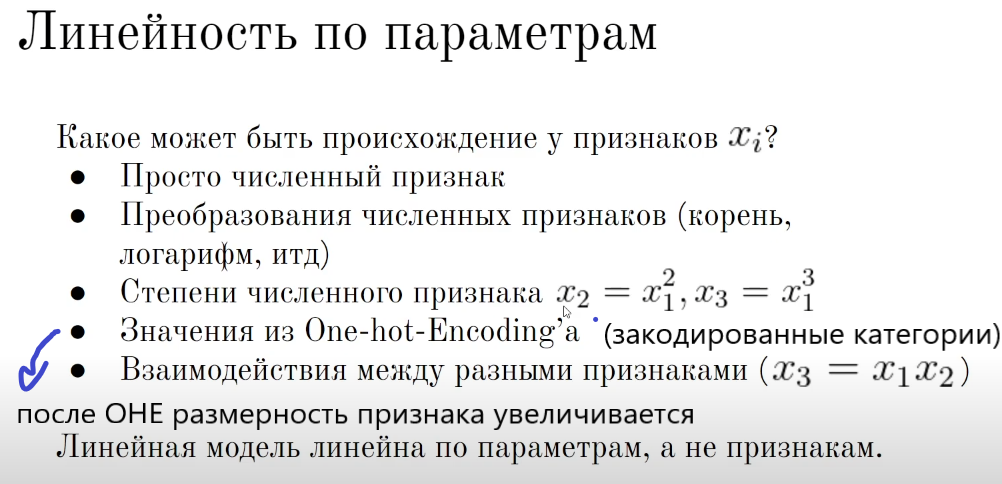

в случае применения: возведения признаков в квадрат, перемножения признаков можно получить более сложное расположение гипер-плоскости, что позволит модели работать лучше **на более сложных данных**

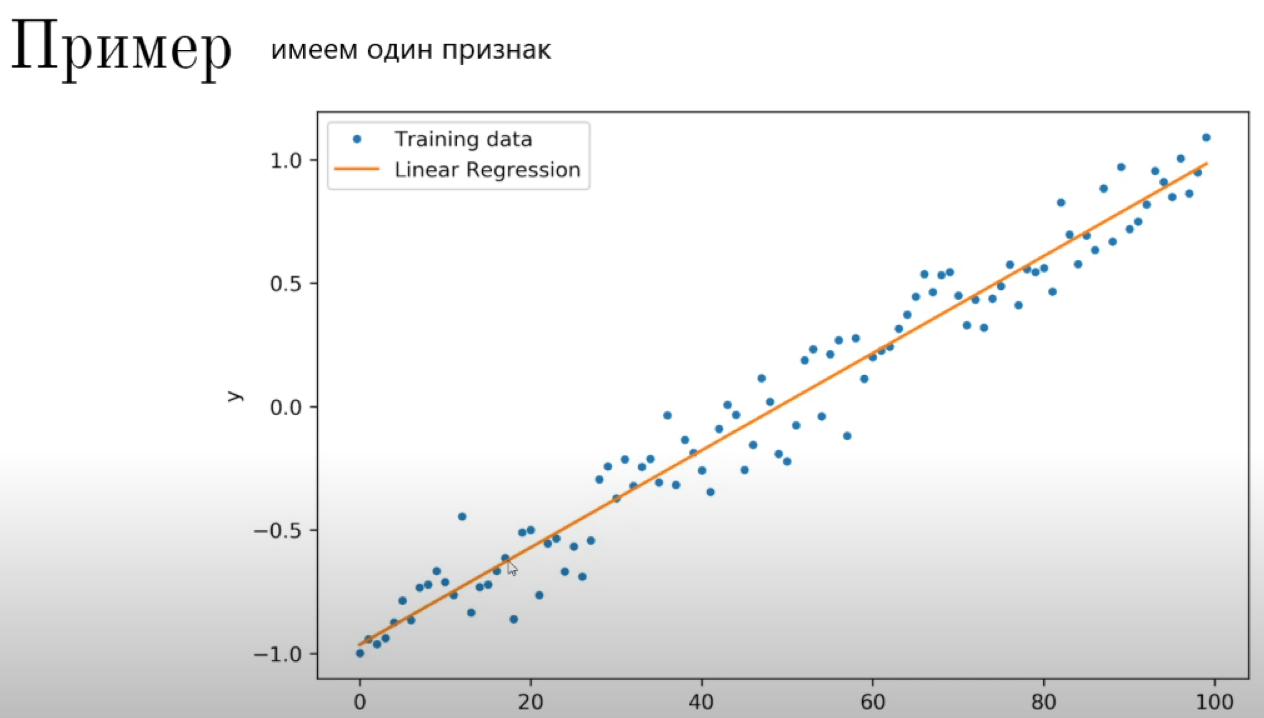

## Подбор весов

# Cправка 
$\left(\left|x\right|\right)'=sign(x)$
*нормы вектора х*

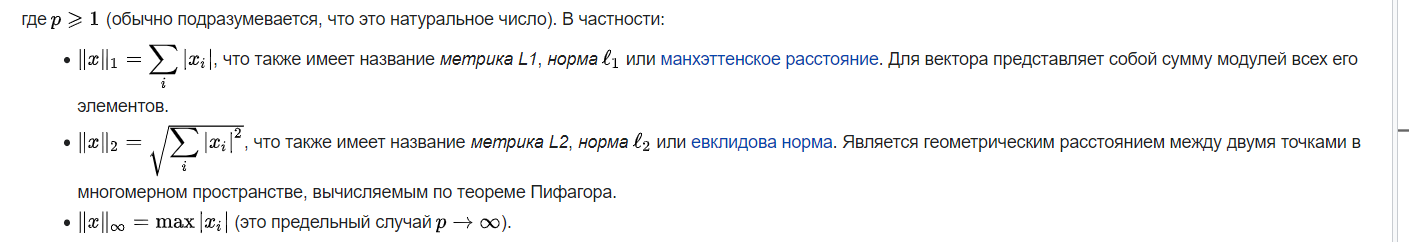

# Функции потерь



### Первый способ - нахождение обратной матрицы (точное решение)

Этот случай работает когда число признаков **равно** числу наблюдений
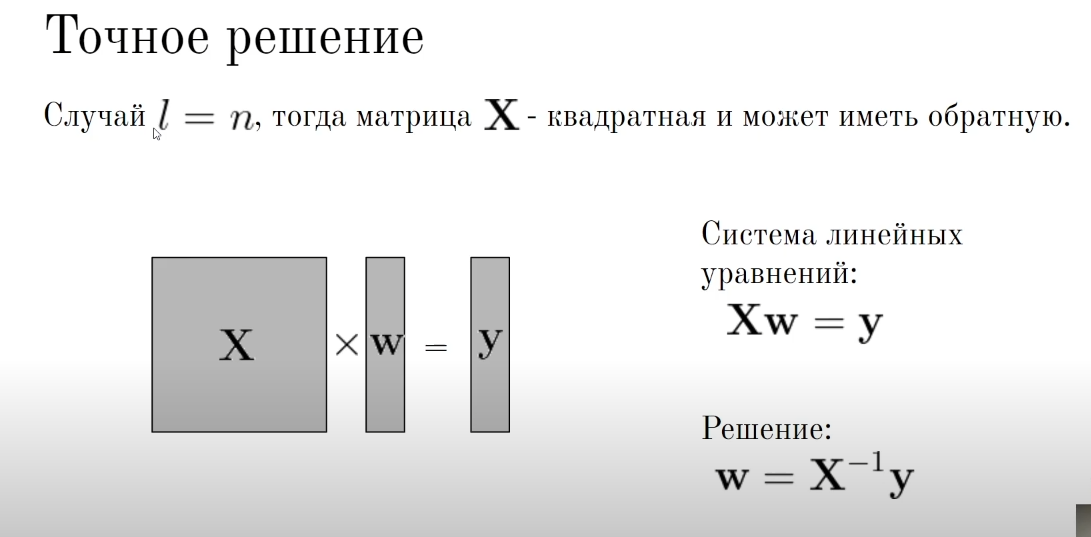

Минусы:
1. Число признаков должно быть равно числу наблюдений
2. Матрица X может оказаться вырожденной (по причине наличия одинаковых объектов, линейно зависимых колонок)
3. Такая модель (из-за пункта 1) будет работать хуже по-сравнению с другими схожими моделями
В случае если столбцы линейно зависмы, то один из них просто **удалаяется**. Также и с объектами - удаляется один из одинаковых



##  2 способ - нахождение псевдо обратной матрицы (приблизителное решение)

Даннный способ работает когда объектов **сильно** больше чем признаков

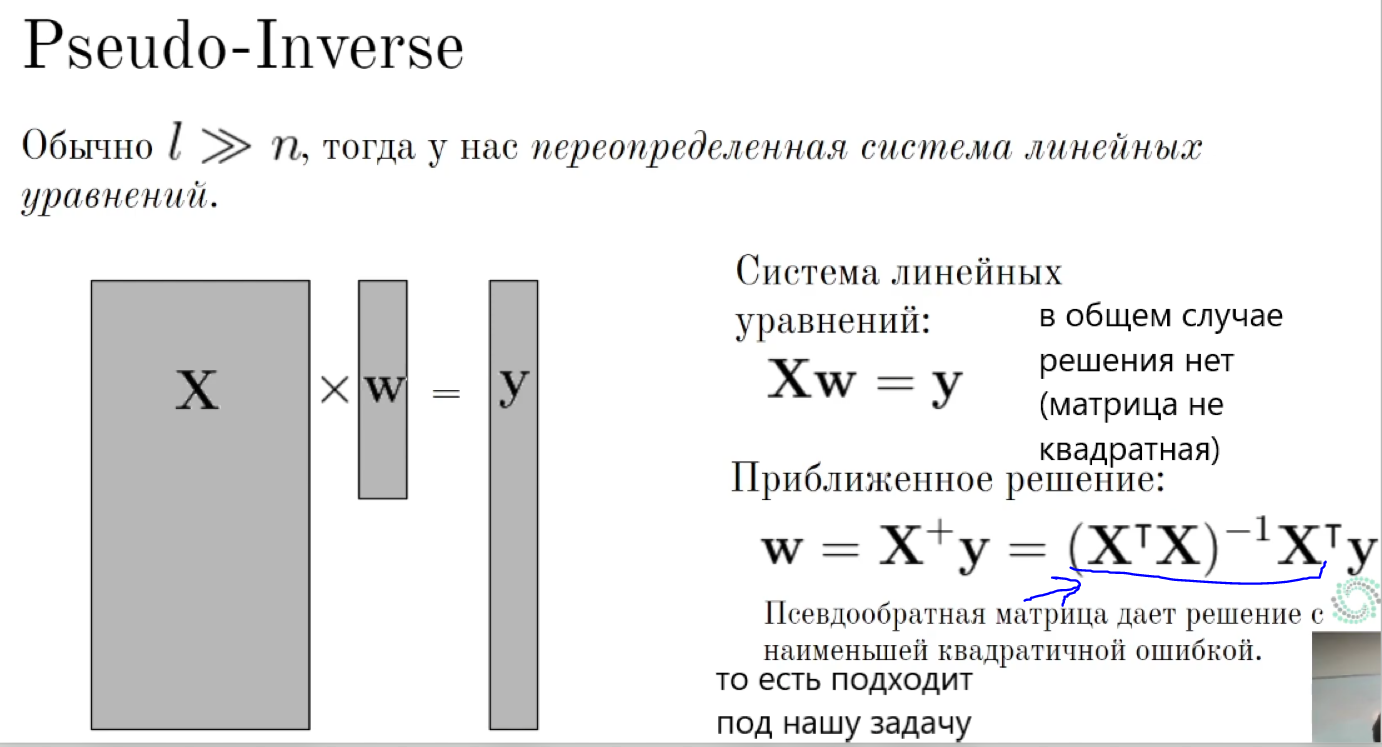

Стоит отметить, что если столбцы линейно зависимы матрица тоже БУДЕТ **вырожденной**

Выведем эту формулу
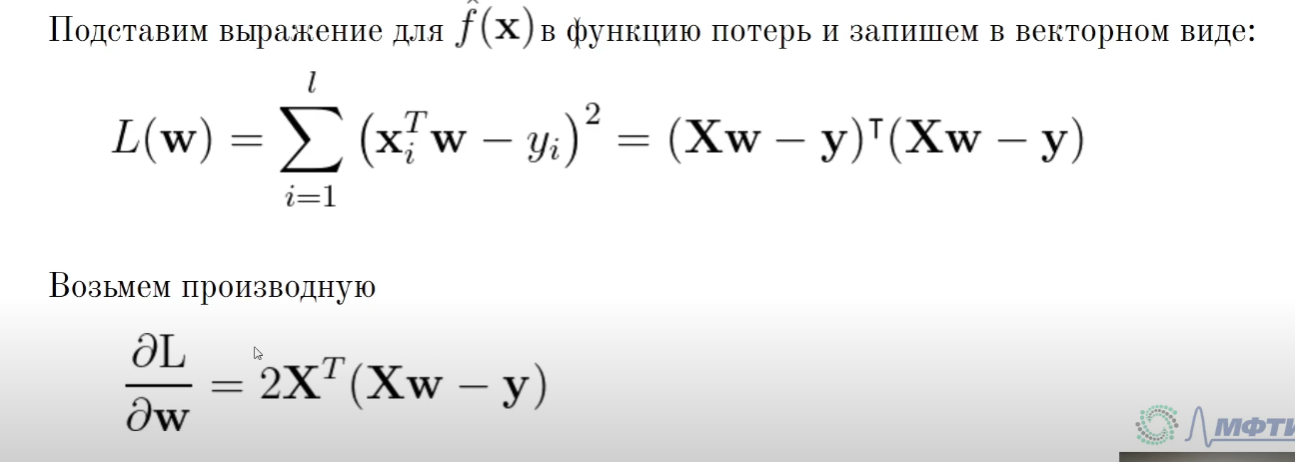

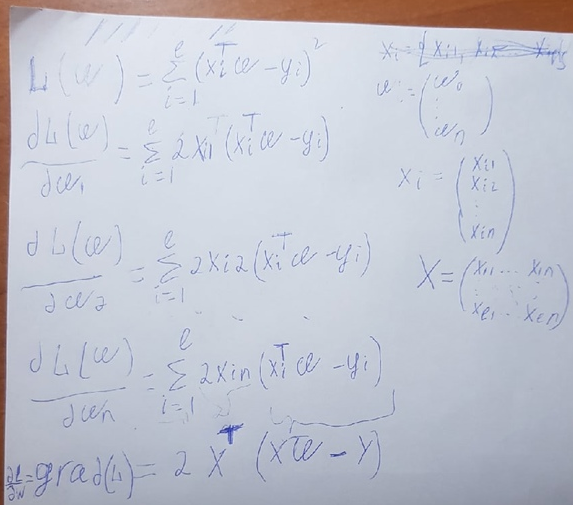

или как то так



Для нахождения минимума просто приравняем градиент нулю (наша функция будет иметь только один минимум (так как это походу положительно определенная(полу определенная квадратичная форма)))
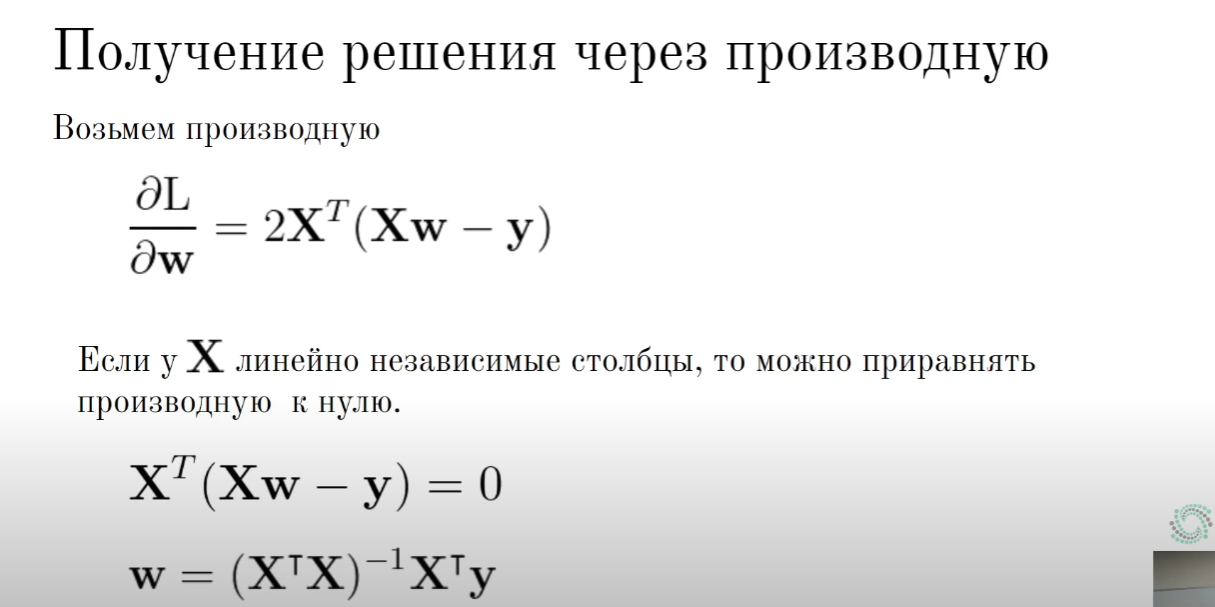

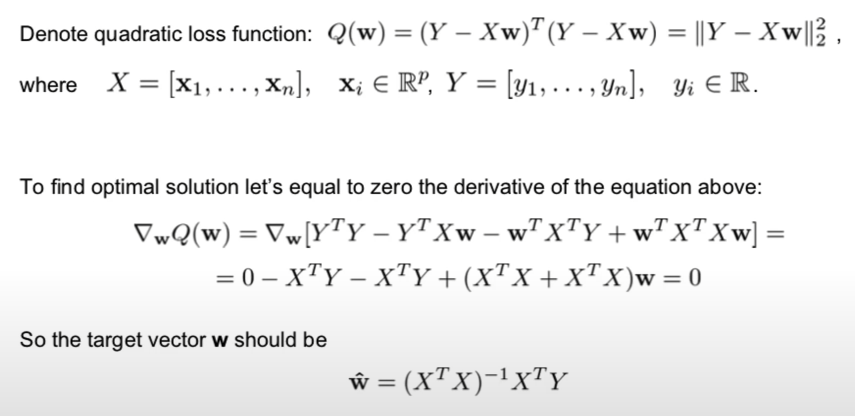

**Минусы!!**
1. Дороговизна взятия обратной матрицы
2. Риск получить больщие слижком большие значения элементов обратной матрицы для памяти компьютера (переполнение), если признаки будут сильно линейно скррелированы (нестабильность вычислений).
3. Риск получить слижком большие веса модели (из-за неодыкватных весов положение гиппер-плоскости может быть нарушено - это может привести к переобучению) 
3. Можно также получить выражденную матирицу (если фичей меньше чем объектов)

**пример**
В квадратной матрице X признаки сильно **скоррелированы**, веса w_true - **истинные**, w_star - найденные методом наименьших квадратов
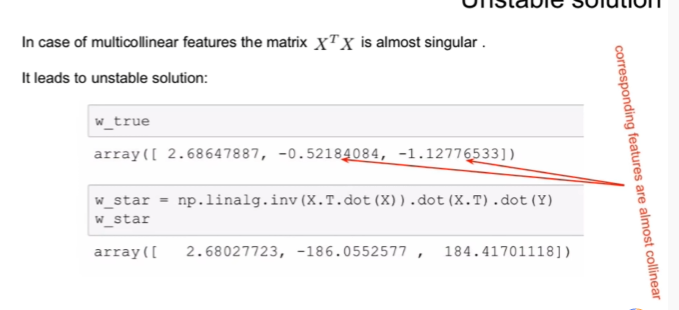
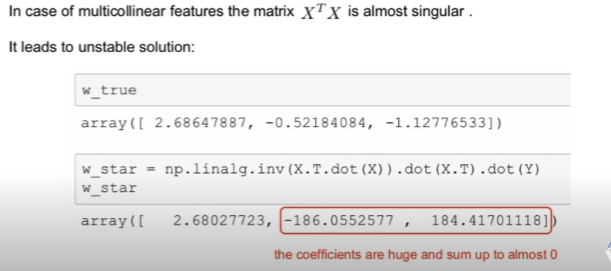


из - за этого поседние две координаты полученной гипер-плоскости высокие и их сумма нулевая

Для **линейной регрессии** при сильной корреляции (близости к линейной функции) признаков есть риск получить слижком большие по значению веса (решения будут уходить в бесконечность). Это может вести к переполнению памяти, в которой лежат эти значения, что **сократит точность предскзания**.

**Регуляризация** — группа методов, суть которых заключается в добавлении некоторых дополнительных ограничений к условию с целью решить некорректно поставленную задачу или предотвратить переобучение. 

Для случая линейной регрессии:
    
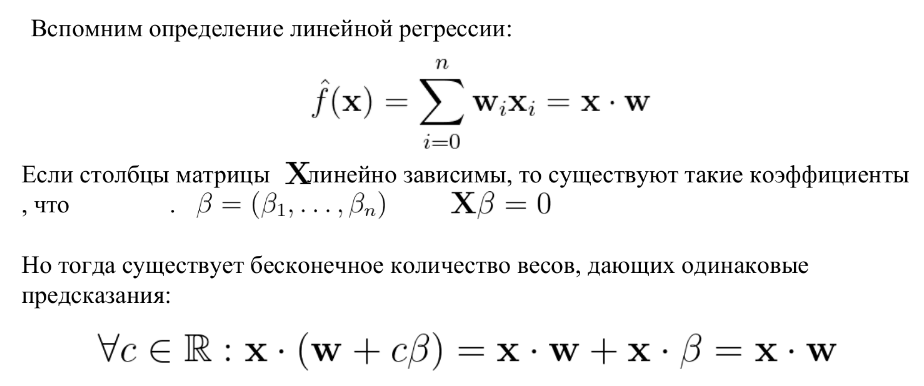

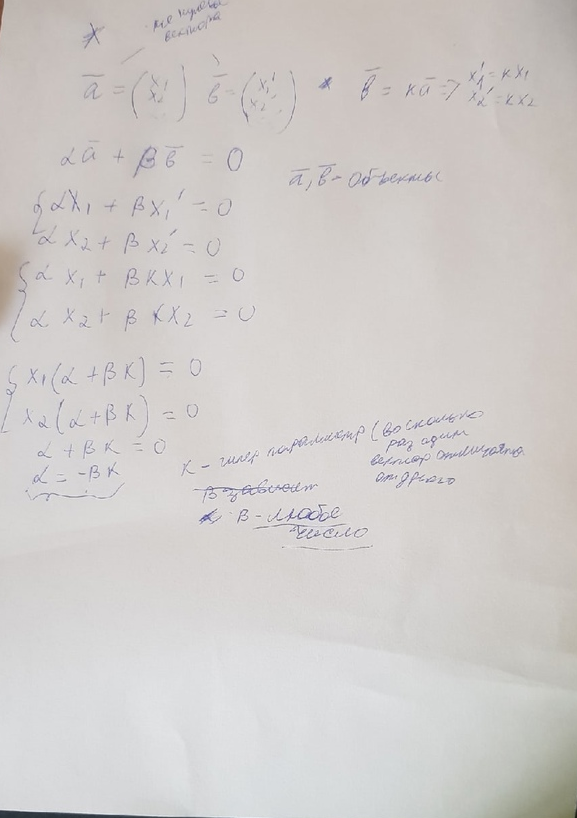

**Регуляризация** позволяет регулировать область значений весов, делая их не большими.
Реализация регуляризации достаточно проста

Для этого к эмпирическому риску добавляяем сумму квадратов весов (или сумму модулей весов), помноженную на какой-то гипер-парамметр beta. При минимизации полученной функции алгоритмы (минимизции) вынуждены будут учитывать эту сумму.

xi-вектор(столбец)

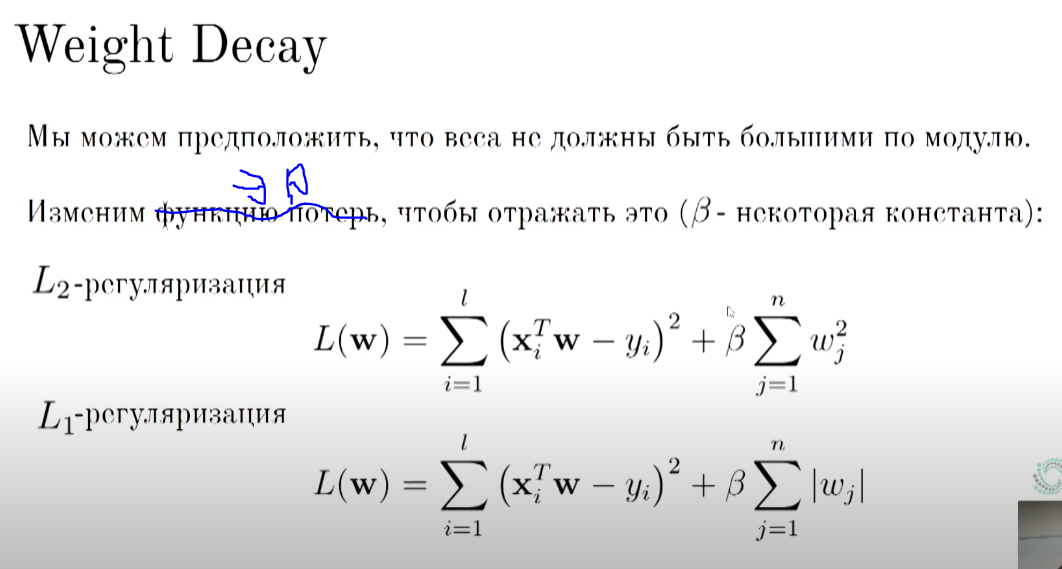


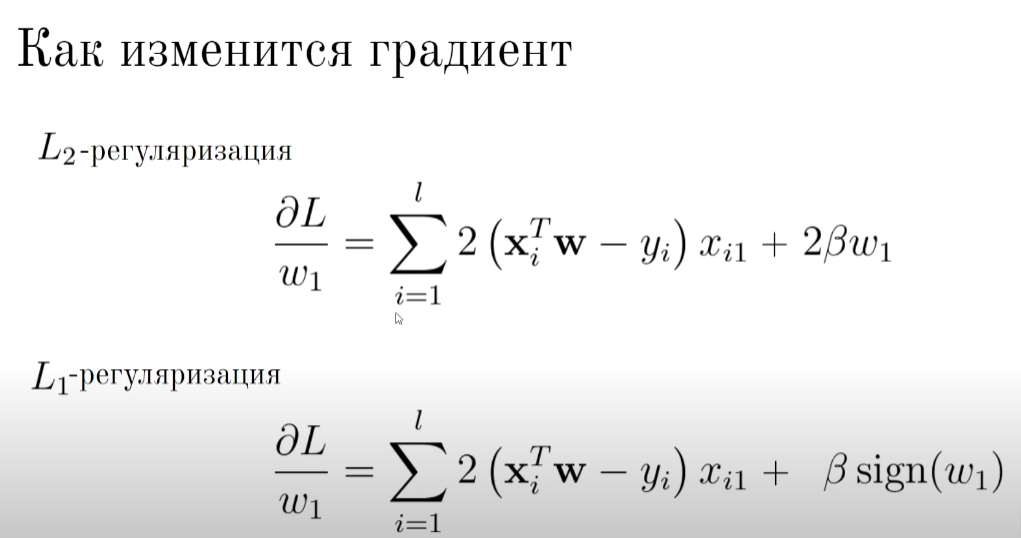

Чаще всего подбирают эти два паррмметра сразу (посредством минимизации одной ЭР включающей и L1 и L2) - ELASTIC NET

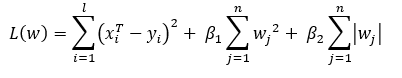
Поэтому следует делить выборку на 3 части: **две обучающие** (одна для оптимизации парамметров, другая для оптимизации гипперпарамметров) о одна контрольная
Подбор гиппер парамметров beta осуществляется при помощи **сетки**: по оси x - beta1, по оси y - beta2

Далее берется какой-то шаг (0.1 например в интервале от 0 до 100).

соответственно цвет каждой ячейки соответствует степени оптимальности данных значений beta1 beta2 (соответствует ЭР, уменьшается с ростом ЭР)

Регуляризация **полезна** для борьбы с **переобучением** (огрпничивает вектор весов)

В действительности даже если наши данные занимают весь диапазон возможных значений входных переменных, никакой переобученности не возникает, даже если наша модель очень сложна. Именно по этой причине всегда желательно иметь как можно больше данных. Переобученность возникает тогда, когда модель пытается «угадать» результат в области, где до этого не было никаких данных. 


**Регуляризацию нужно применять и для других типов моделей, особенно если данных мало**

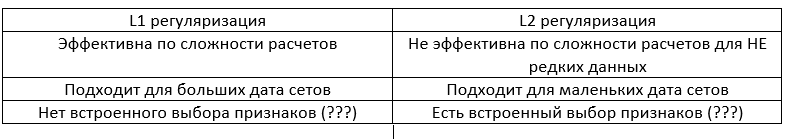

# Теорема Гауса-Маркова

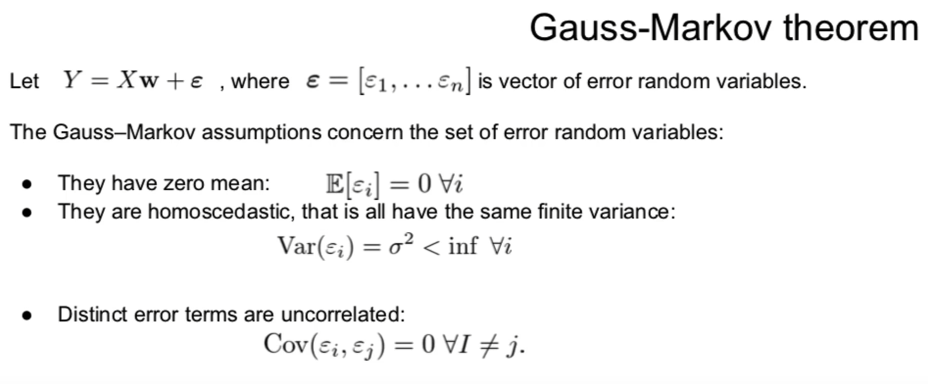

$\varepsilon$ - вектор ошибок

$\varepsilon_i$ - распределение i-той ошибки

Тероема. Если

1. Каждое распределение из вектора ошибок имеет нулевое среднее (несиещено)
2. Каждое распределение из вектора ошибок имеет конечную дисперсию (не равную $\infty$)
3. Распределения ошибок независимы

То полученное нами решения (веса) полученные **методом наименьших квадратов** имеют наименьшую дисперсию (то есть эффективны) является оптималным среди несмещеннных

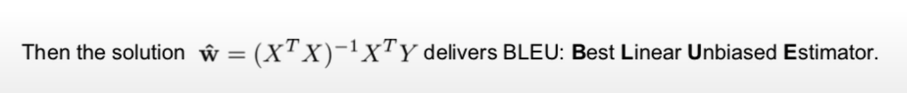

## Метрики линейной регресси и подходящие для них типы регулеризации
**ВАЖНО** Метрика это величина считающаяся на контрольной выборке и нужна для оценки модели **после** обучения. Это не функция потерь.

(Однако никто не мешает нам использовать их формулы в качестве функций потерь)
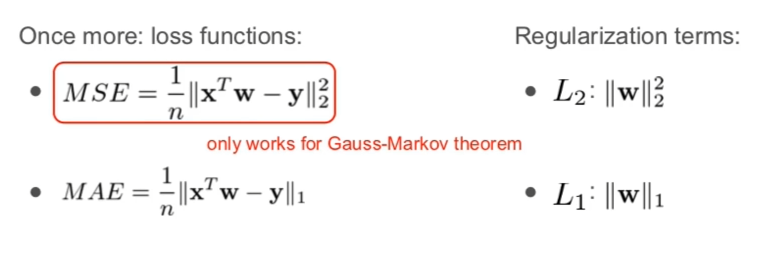

MSE - метод наименьших квадратов:
1. Соответствует теореме Гауса-Маркова
2. Дифференцируемая
3. КРАЙНЕ ЧУВСТВИТЕЛЬНА К ШУМУ

MAE (Mean absolute error) - средняя абсолютная ошибка
1. По-умолчанию НЕ дифференцируемая (можно обойти это)
2. Менее восприимчива к шуму

L1 регуляризация:
1. не дифферецируемая (сейчас можно продифференциорвать)
2. отбирает фичи (зануляет коэффиценты при незначимых фичах)
3. держит веса маленькими

L2 регуляризация:
1. держит веса маленькими 
2. делает функцию более стабильной
3. дифференцируемая

## Визуализация регуляризации

Пусть имеется модель состоящая из двух фич w = (beta1, beta2), beta - положение весов в миниимуме функции эмпирического риска (без регуляризации).
Ниже приведены проекции двух функций на плоскость x0y. Крастная (с полосками) отностся к эмпиричесоому риску (например функция метода наименьших квадратов) без регуляризации, зеленая фигура (для L1 - ромб, для L2 - окружность) соответствует регуляризации (при подборе весов beta1 и beta2 изменяется ее размер). Оптимизирующий метод ищет такое положение весов, при при котором веса близки положению минимума функции (положение beta), но которое, при этом лежит в пределах зеленой фигуры.

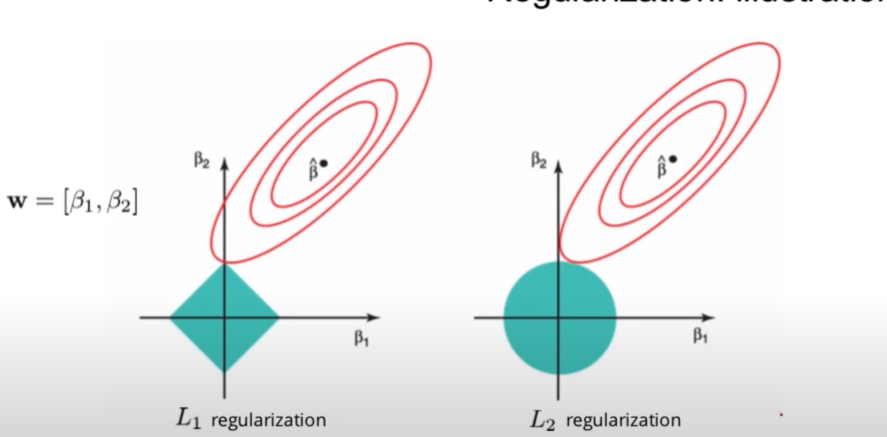

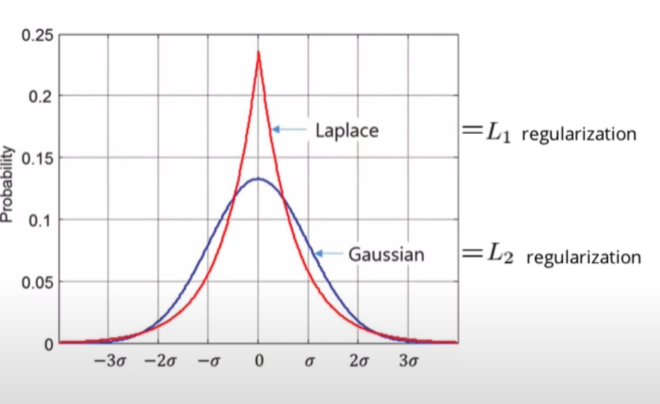

При L1 регуляризации веса попадают чаще в ноль так как метод (регуляризации) считает, что признаки распределены в соответствии с функцией лапласа (которая более прижата к нулю)

# Важно


Из независимости двух случайных величин следует их некоррелированность, т.е. равенство р = 0. Однако **некоррелированность двух случайных величин еще не означает их независимость**.

## Основы для построения правильной модели
метрика - эмпирический риск
1. Метрики должны соответствовать задаче
2. Правильная валидация модели (валидация - ключ к стабильной модели). Строить валидацию нужно ОЧЕНЬ аккуратно
3. На данных у которых есть иерархия (например временная), не нужно предсказывать данные, лежащие во времени вне интервала  (например времянного), на котором обучалась модель. В таком случае модель работать не будет. Исключением могут быть случаи когда мы знаем, данные соответствуют распределеню, которое сохраняется во времени.


Если на новых данных (из генеральной совоккупности), которые взяты из реального мира а не из известных данных (данных в выборке) модель работает сильно хуже, чем на известной тестовой выборке, значит проблема **в валидации** исходных данных (скорее всего)

# Практика 

Линейные методы хорошо подходят для работы с разреженными данными — к таковым относятся, например, тексты. Это можно объяснить высокой скоростью обучения и небольшим количеством параметров, благодаря чему удается избежать переобучения.

Линейная регрессия имеет несколько разновидностей в зависимости от того, какой регуляризатор используется. Мы будем работать с гребневой регрессией, где применяется квадратичный, или L2-регуляризатор.

## TF-IDF признак

Это своеобразная мера важности слова в контексте страницы

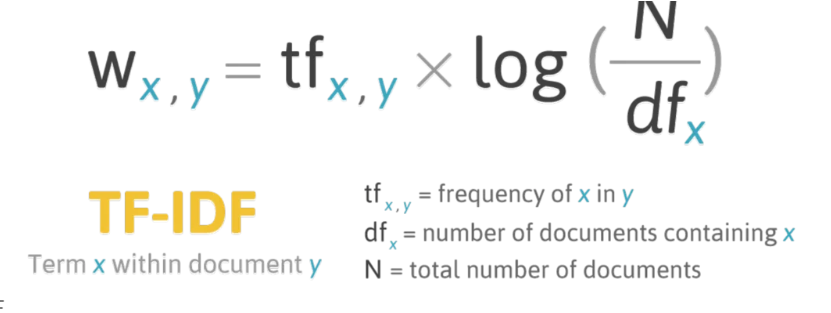


In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from sklearn.feature_extraction import DictVectorizer

In [2]:

df = pd.read_csv('salary-train.csv', sep=',')
df

FullDescription LocationNormalized  \
0      International Sales Manager London ****k  ****...             London   
1      An ideal opportunity for an individual that ha...             London   
2      Online Content and Brand Manager// Luxury Reta...  South East London   
3      A great local marketleader is seeking a perman...            Dereham   
4      Registered Nurse / RGN  Nursing Home for Young...   Sutton Coldfield   
...                                                  ...                ...   
59995  As a result of continued growth, First Class S...        Whitley Bay   
59996  PHP / MVC Web Developer  MacclesfieldCirca ***...       Macclesfield   
59997  Staff Nurse, Nursing Home, Baldock White Recru...            Baldock   
59998  This is one of the best agency side opportunit...           The City   
59999  Must have CSCS card must have asbestos awarene...             London   

      ContractTime  SalaryNormalized  
0        permanent             33000  
1        permanent             50000  
2        permanent             40000  
3        permanent             22500  
4              NaN             20355  
...            ...               ...  
59995     contract             26400  
59996    permanent             26000  
59997          NaN             24500  
59998    permanent             65000  
59999          NaN             23040  

[60000 rows x 4 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   FullDescription     60000 non-null  object
 1   LocationNormalized  60000 non-null  object
 2   ContractTime        44418 non-null  object
 3   SalaryNormalized    60000 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 1.8+ MB


In [4]:
df.agg(lambda x: len(pd.unique(x)), axis=0)

FullDescription       59821
LocationNormalized     1763
ContractTime              3
SalaryNormalized       3930
dtype: int64

In [5]:
df['FullDescription'] = df['FullDescription'].apply(str.lower)
df

FullDescription LocationNormalized  \
0      international sales manager london ****k  ****...             London   
1      an ideal opportunity for an individual that ha...             London   
2      online content and brand manager// luxury reta...  South East London   
3      a great local marketleader is seeking a perman...            Dereham   
4      registered nurse / rgn  nursing home for young...   Sutton Coldfield   
...                                                  ...                ...   
59995  as a result of continued growth, first class s...        Whitley Bay   
59996  php / mvc web developer  macclesfieldcirca ***...       Macclesfield   
59997  staff nurse, nursing home, baldock white recru...            Baldock   
59998  this is one of the best agency side opportunit...           The City   
59999  must have cscs card must have asbestos awarene...             London   

      ContractTime  SalaryNormalized  
0        permanent             33000  
1        permanent             50000  
2        permanent             40000  
3        permanent             22500  
4              NaN             20355  
...            ...               ...  
59995     contract             26400  
59996    permanent             26000  
59997          NaN             24500  
59998    permanent             65000  
59999          NaN             23040  

[60000 rows x 4 columns]

In [6]:
df['FullDescription'].replace('[^a-zA-Z0-9]', ' ', regex=True, inplace=True)
df

FullDescription LocationNormalized  \
0      international sales manager london     k      ...             London   
1      an ideal opportunity for an individual that ha...             London   
2      online content and brand manager   luxury reta...  South East London   
3      a great local marketleader is seeking a perman...            Dereham   
4      registered nurse   rgn  nursing home for young...   Sutton Coldfield   
...                                                  ...                ...   
59995  as a result of continued growth  first class s...        Whitley Bay   
59996  php   mvc web developer  macclesfieldcirca    ...       Macclesfield   
59997  staff nurse  nursing home  baldock white recru...            Baldock   
59998  this is one of the best agency side opportunit...           The City   
59999  must have cscs card must have asbestos awarene...             London   

      ContractTime  SalaryNormalized  
0        permanent             33000  
1        permanent             50000  
2        permanent             40000  
3        permanent             22500  
4              NaN             20355  
...            ...               ...  
59995     contract             26400  
59996    permanent             26000  
59997          NaN             24500  
59998    permanent             65000  
59999          NaN             23040  

[60000 rows x 4 columns]

In [7]:
vectorizer = TfidfVectorizer(min_df=5)
X = vectorizer.fit_transform(df['FullDescription'])

In [8]:
X.get_shape() # мы получили матрицу в которой каждый столбец соответстыует своему слову (которое встречается 5 или более раз)
# строки соответствуют объектам
# каждая ячейка кодируется 0 или единицой

(60000, 22861)

In [9]:
len(vectorizer.get_feature_names())

22861

X имеет специальный тип в котором лежит матриица, он нужен для оптимизации вычислений

In [10]:
df['LocationNormalized'].fillna('nan', inplace=True)
df[ 'ContractTime'].fillna('nan', inplace=True)
df

FullDescription LocationNormalized  \
0      international sales manager london     k      ...             London   
1      an ideal opportunity for an individual that ha...             London   
2      online content and brand manager   luxury reta...  South East London   
3      a great local marketleader is seeking a perman...            Dereham   
4      registered nurse   rgn  nursing home for young...   Sutton Coldfield   
...                                                  ...                ...   
59995  as a result of continued growth  first class s...        Whitley Bay   
59996  php   mvc web developer  macclesfieldcirca    ...       Macclesfield   
59997  staff nurse  nursing home  baldock white recru...            Baldock   
59998  this is one of the best agency side opportunit...           The City   
59999  must have cscs card must have asbestos awarene...             London   

      ContractTime  SalaryNormalized  
0        permanent             33000  
1        permanent             50000  
2        permanent             40000  
3        permanent             22500  
4              nan             20355  
...            ...               ...  
59995     contract             26400  
59996    permanent             26000  
59997          nan             24500  
59998    permanent             65000  
59999          nan             23040  

[60000 rows x 4 columns]

# Ппример Оne Hot encoding(-a)

In [27]:
data = [
    list('aac'),
    list('bbb'),
    list('cca'),
]
print(data, '\n\n\n')
# строки матрицы объекты, стодбцы - признаки
dicts = pd.DataFrame(
            data=data,
            columns=['A', 'B', 'C'],
        ).to_dict('records')
# далее эти признаки преобразуются в список словарей, где каждый словарь соответствует своему объекту
print(dicts, '\n\n\n\n\n')
vect = DictVectorizer()
X = vect.fit_transform(dicts)
# при передаче строковых данных (в массиве словарей) в fit_transform выполняет Оne Hot encoding
# при котором получается матрица, строки соответствуют объектам
# столбцы условно можно разделить на блока ширина (в столбцах) каждого блока равна каличеству уникальных строк 
# в столбце датафрейма
# каждый столбец такого блока соответствует своему уникальному слову, а элементы столбца - бинарные 
# (1 - слово есть у данного объекта, 0 - нет)
print(X.toarray(), '\n\n')
X
# (в блоках категории отсортированы в алфовитном порядке)

[['a', 'a', 'c'], ['b', 'b', 'b'], ['c', 'c', 'a']] 



[{'A': 'a', 'B': 'a', 'C': 'c'}, {'A': 'b', 'B': 'b', 'C': 'b'}, {'A': 'c', 'B': 'c', 'C': 'a'}] 





[[1. 0. 0. 1. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 1. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 1. 1. 0. 0.]] 




<3x9 sparse matrix of type '<class 'numpy.float64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [12]:
data = [
    list('aac'),
    list('bbb'),
    list('cca'),
]
print(data, '\n\n\n')
# строки матрицы объекты, стодбцы - признаки
dicts = pd.DataFrame(
            data=data,
            columns=['A', 'B', 'C'],
        ).to_dict('records')
# далее эти признаки преобразуются в список словарей, где каждый словарь соответствует своему объекту
print(dicts, '\n\n\n\n\n')
vect = DictVectorizer()
X = vect.fit_transform(dicts)
# fit - инициализирует объект 
print(X.toarray(), '\n\n')
X

[['a', 'a', 'c'], ['b', 'b', 'b'], ['c', 'c', 'a']] 



[{'A': 'a', 'B': 'a', 'C': 'c'}, {'A': 'b', 'B': 'b', 'C': 'b'}, {'A': 'c', 'B': 'c', 'C': 'a'}] 





[[1. 0. 0. 1. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 1. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 1. 1. 0. 0.]] 




<3x9 sparse matrix of type '<class 'numpy.float64'>'
	with 9 stored elements in Compressed Sparse Row format>

# Смысл fit_transform

In [25]:
data = [
    list('aac'),
    list('bbb'),
    list('cca'),
]
dicts = pd.DataFrame(
            data=data,
            columns=['A', 'B', 'C'],
        ).to_dict('records')

worker = DictVectorizer()
worker.fit(dicts)
# fit формирует парамметры модели  на основе входных объектов
# (в нашем случае объект получит и будет хранить словарь)
worker.transform(dicts)
# transform - формирует матрицу one-hot-encoding на основе словаря
# fit_transform вызывает fit и transform на данных из ОНДОГО словаря

<3x9 sparse matrix of type '<class 'numpy.float64'>'
	with 9 stored elements in Compressed Sparse Row format>

# Валидация и сходных

In [11]:


enc = DictVectorizer()
X_train_categ = enc.fit_transform(df[['LocationNormalized', 'ContractTime']].to_dict('records'))
X_test_categ = enc.transform(df[['LocationNormalized', 'ContractTime']].to_dict('records'))
X_train_categ.shape, X_test_categ.shape

((60000, 1766), (60000, 1766))

In [12]:

df[['LocationNormalized', 'ContractTime']].to_dict('records')[:10]

[{'LocationNormalized': 'London', 'ContractTime': 'permanent'},
 {'LocationNormalized': 'London', 'ContractTime': 'permanent'},
 {'LocationNormalized': 'South East London', 'ContractTime': 'permanent'},
 {'LocationNormalized': 'Dereham', 'ContractTime': 'permanent'},
 {'LocationNormalized': 'Sutton Coldfield', 'ContractTime': 'nan'},
 {'LocationNormalized': 'Crawley', 'ContractTime': 'nan'},
 {'LocationNormalized': 'UK', 'ContractTime': 'permanent'},
 {'LocationNormalized': 'Bristol', 'ContractTime': 'permanent'},
 {'LocationNormalized': 'Central London', 'ContractTime': 'permanent'},
 {'LocationNormalized': 'South East London', 'ContractTime': 'permanent'}]